In [1]:
from exercise_blanks import *
n_epochs = 2

In [4]:
data_manager = DataManager(ONEHOT_AVERAGE, batch_size=BATCH_SIZE)
model = LogLinear(embedding_dim=data_manager.get_input_shape()[0])

In [3]:
# train & vaildate - one hot
training_metrics_dict = train_model(model,
                                    data_manager,
                                    nn.BCEWithLogitsLoss(),
                                    n_epochs,
                                    LEARNING_RATE,
                                    WEIGHT_DECAY)

# --------- Starting epoch 0/2 --------- #
# --------- Starting epoch 1/2 --------- #


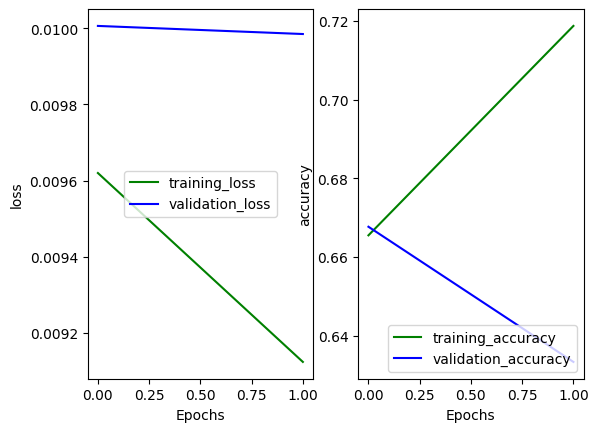

In [4]:
epochs = range(n_epochs)
fig, axes = plt.subplots(1, 2)

for metric_name, (metric, plot_idx, graph_color) in training_metrics_dict.items():
    axes[plot_idx].plot(epochs, metric, graph_color, label=metric_name)
    axes[plot_idx].set_ylabel(metric_name.split("_")[1])
    axes[plot_idx].set_xlabel("Epochs")
    # axes[plot_idx].set_ylim(0, 1)

axes[0].legend(loc=10)
axes[1].legend(loc=4)

In [13]:
# test - one hot
test_iterator = data_manager.get_torch_iterator(TEST)
test_predictions, test_true, test_loss, test_accuracy = get_prediction_for_data(model, test_iterator, nn.BCEWithLogitsLoss())

print(f"Test loss: {np.round(test_loss, 3)} accuracy: {np.round(test_accuracy, 3)} over entire dataset")

Test loss: 10.397 accuracy: 7.609 over entire dataset


In [14]:
# negated polaity examples
indices = data_loader.get_negated_polarity_examples(data_manager.sentences[TEST])
accuracy = binary_accuracy(preds=test_predictions[indices], y=test_true[indices])
print(f"Test accuracy: {np.round(accuracy, 3)} over negated polarity examples")

Test accuracy: 0.548 over negated polarity examples


In [15]:
# rare_words examples
indices = data_loader.get_rare_words_examples(data_manager.sentences[TEST], data_manager.sentiment_dataset)
accuracy = binary_accuracy(preds=test_predictions[indices], y=test_true[indices])
print(f"Test accuracy: {np.round(accuracy, 3)} over rare words examples")

Test accuracy: 0.64 over rare words examples
